<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data wrangling</a></span><ul class="toc-item"><li><span><a href="#Null-values-in-the-train-set" data-toc-modified-id="Null-values-in-the-train-set-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Null values in the train set</a></span></li><li><span><a href="#Null-values-in-the-test-set" data-toc-modified-id="Null-values-in-the-test-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Null values in the test set</a></span></li><li><span><a href="#Polarity-and-subjectivity" data-toc-modified-id="Polarity-and-subjectivity-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Polarity and subjectivity</a></span></li><li><span><a href="#Ratings-grouping" data-toc-modified-id="Ratings-grouping-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ratings grouping</a></span></li><li><span><a href="#Binary-Polarity" data-toc-modified-id="Binary-Polarity-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Binary Polarity</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Rating-Countplot" data-toc-modified-id="Rating-Countplot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Rating Countplot</a></span></li><li><span><a href="#Binary-low-rating-column" data-toc-modified-id="Binary-low-rating-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Binary low-rating column</a></span></li><li><span><a href="#Which-patients-tend-to-have-more-negative-reviews?" data-toc-modified-id="Which-patients-tend-to-have-more-negative-reviews?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Which patients tend to have more negative reviews?</a></span></li></ul></li><li><span><a href="#Text-vectorizer" data-toc-modified-id="Text-vectorizer-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Text vectorizer</a></span><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Count-Vectorizer" data-toc-modified-id="Count-Vectorizer-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Count Vectorizer</a></span></li><li><span><a href="#TfidVectorizer" data-toc-modified-id="TfidVectorizer-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>TfidVectorizer</a></span></li></ul></li></ul></div>

In [347]:
import pandas as pd
#import dataframe_image as dfi
import os
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import statsmodels.api as sm
import re
import nltk
import spacy
import math
import sklearn

from pandas_profiling.utils.cache import cache_file

from sklearn import metrics, datasets, linear_model, preprocessing
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_recall_curve, mean_squared_error, f1_score, plot_confusion_matrix  
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from textblob import TextBlob
from wordcloud import WordCloud
import scipy.sparse
import seaborn as sns
import string

#nltk.download('punkt')
#print(os.getcwd())
path="/Users/atousachaharsoughshirazi/drug_review"
os.chdir(path)
file_train="drugsComTrain_raw.csv"
df=pd.read_csv(file_train, header=0)
file_test="drugsComTest_raw.csv"
df_test=pd.read_csv(file_test, header=0)

# Introduction

Pharmaceutical companies develop drugs based on intensive research and clinical trials. However, clinical trials provide a limited resource to examine the drugs and their side effects, and they are only sufficient for approval for mass production. These drugs are under constant improvement and the patients' reviews after mass production are a great source of information for pharmaceutical companies to improve their products. Specifically, low ratings of a drug (rating<4) hurts the company and the companies would like to eliminate that.  Some problems that we address in this project are:

* Classification: Predict the rating of the drug based on the review?
* Sentiment analysis: What elements of a review make it more helpful to others? Which patients tend to have more negative reviews? Which patients give low ratings (rating<4)? Determine if a review is positive, neutral, or negative.

This data set contains patients review and rating of 3436 different drugs. The condition of the patient for which the drug is taken is given and the number of people who found the review useful. There are 

# Data wrangling

In [348]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [349]:
df.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [350]:
df.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [351]:
df.shape

(161297, 7)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [353]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name, df[column_name].nunique())

uniqueID 161297
drugName 3436
condition 884
review 112329
rating 10
date 3579
usefulCount 389


## Null values in the train set

In [354]:
df.isna().any().any()

True

In [355]:
df.isna().sum().sum()

899

In [356]:
temp = df.isna().sum()/(len(df))*100
print("Column with lowest amount of missings contains {} % missings.".format(temp.min()))
print("Column with highest amount of missings contains {} % missings.".format(temp.max()))


Column with lowest amount of missings contains 0.0 % missings.
Column with highest amount of missings contains 0.5573569254232875 % missings.


In [357]:
df.loc[:, df.isnull().any()].columns

Index(['condition'], dtype='object')

In [358]:
df.dropna(inplace=True)

In [359]:
df.isnull().values.any()

False

In [360]:
df.isnull().sum().sum()

0

In [361]:
df.shape

(160398, 7)

## Null values in the test set

In [362]:
df_test.isna().any().any()

True

In [363]:
df_test.isna().sum().sum()

295

In [364]:
df_test.dropna(inplace=True)

## Polarity and subjectivity

In [365]:
df[['polarity', 'subjectivity']] = df['review'].apply(lambda text: pd.Series(TextBlob(text).sentiment))

In [366]:
bins = [-1 ,-0.6, -0.2, 0.2, 0.6, 1]
labels = ['very negative', 'negative' , 'neutral', 'positive', 'very positive']
df['sentiment'] = pd.cut(df.polarity, bins, labels = labels,include_lowest = True)

df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,polarity,subjectivity,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,0.000000,0.000000,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0.168333,0.431349,neutral
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.067210,0.402155,neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0.179545,0.665909,neutral
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,0.194444,0.401389,neutral


## Ratings grouping

In [367]:
bins = [0 ,4, 7, np.inf]
labels = ['<4', '4-7', '>7']
df['rating_groups'] = pd.cut(df.rating, bins, labels = labels,include_lowest = True)

df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,polarity,subjectivity,sentiment,rating_groups
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,0.000000,0.000000,neutral,>7
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0.168333,0.431349,neutral,>7
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.067210,0.402155,neutral,4-7
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0.179545,0.665909,neutral,>7
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,0.194444,0.401389,neutral,>7


<AxesSubplot:xlabel='polarity', ylabel='Count'>

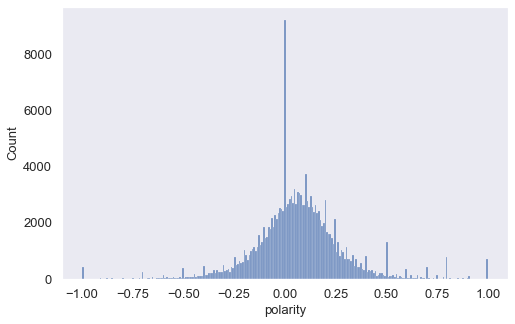

In [368]:
sns.histplot(x="polarity", data=df)

## Binary Polarity

In [369]:
bins = [-1,0, 1]
labels = ['negative', 'positive']
df['polarity_binary'] = pd.cut(df.polarity, bins, labels = labels, right=False, include_lowest = True)

df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,polarity,subjectivity,sentiment,rating_groups,polarity_binary
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,0.000000,0.000000,neutral,>7,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0.168333,0.431349,neutral,>7,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.067210,0.402155,neutral,4-7,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0.179545,0.665909,neutral,>7,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,0.194444,0.401389,neutral,>7,positive


In [370]:
df.polarity_binary.replace(['negative','positive'],[1,0] ,inplace=True)
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,polarity,subjectivity,sentiment,rating_groups,polarity_binary
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,0.000000,0.000000,neutral,>7,0.0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0.168333,0.431349,neutral,>7,0.0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.067210,0.402155,neutral,4-7,0.0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0.179545,0.665909,neutral,>7,0.0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,0.194444,0.401389,neutral,>7,0.0


In [371]:
df.polarity_binary.value_counts()

0.0    106642
1.0     53030
Name: polarity_binary, dtype: int64

# EDA

## Rating Countplot

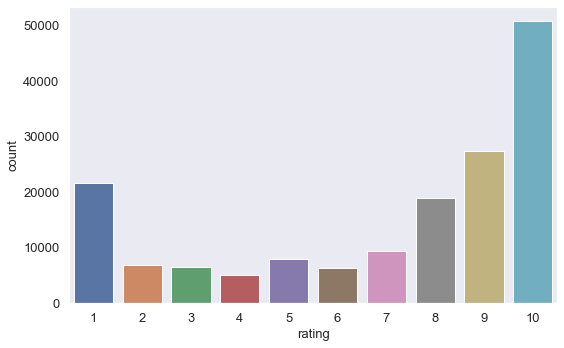

In [372]:
sns_plot=sns.countplot(x="rating", data=df)
plt.tight_layout()
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/drug_review/figures/rating_countplot.png') 

## Binary low-rating column

Later we are interested to investigate which patients tend to give low ratings (rating<4) and what elements in the reviews make a low rating. Therefore, it is useful to add a column and categorize the reviews as a separate binary group. Since we are interested in low rating reviews we will assign 1 to low ratings and 0 to others.

In [373]:
df['rating_binary']=df.rating.replace([1,2,3, 4, 5,6,7,8,9,10],[1,1,1,0,0,0,0,0,0,0])
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,polarity,subjectivity,sentiment,rating_groups,polarity_binary,rating_binary
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,0.000000,0.000000,neutral,>7,0.0,0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0.168333,0.431349,neutral,>7,0.0,0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.067210,0.402155,neutral,4-7,0.0,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0.179545,0.665909,neutral,>7,0.0,0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,0.194444,0.401389,neutral,>7,0.0,0


In [374]:
df.rating_binary=df.rating_binary.astype(int)

## Which patients tend to have more negative reviews?

These are the top patient conditions that gave negative reviews. Patients for birth control drugs have significantly higher negative reviews.

In [376]:
list1=df[df['polarity']<0].condition.value_counts().sort_values(ascending=False)[:10].index.values
list1.astype(str)
df[['condition', 'polarity_binary']].groupby('condition').sum().sort_values(by='polarity_binary', ascending=False)[:10]

,polarity_binary
condition,
Birth Control,11126.0
Depression,2598.0
Acne,1864.0
Anxiety,1661.0
Pain,1629.0
Bipolar Disorde,1211.0
Vaginal Yeast Infection,1204.0
Insomnia,1090.0
Abnormal Uterine Bleeding,1003.0


In [377]:
df_new=df[df['condition'].isin(list1)][df['polarity']<0]

<ipython-input-377-6e0fc7ef379f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new=df[df['condition'].isin(list1)][df['polarity']<0]


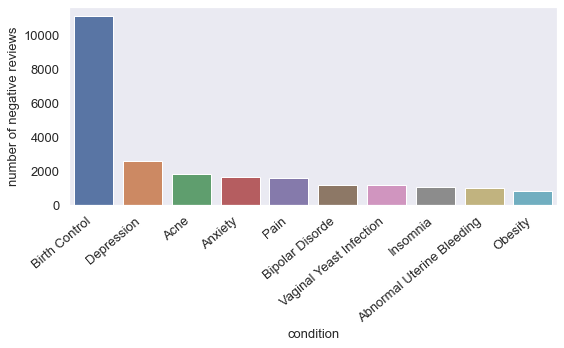

In [378]:
sns.set(rc={'axes.grid':False, 
            'axes.labelsize':13,
            'figure.figsize':(8, 5),
            'xtick.labelsize':13,
            'ytick.labelsize':13})

sns_plot=sns.countplot(x='condition', data=df_new, order=list1)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
sns_plot.set(ylabel='number of negative reviews')
plt.tight_layout()
plt.show()
fig = sns_plot.get_figure()
fig.savefig('/Users/atousachaharsoughshirazi/drug_review/figures/top#ofnegativereviewsbycondition.png') 

In [424]:
#df['condition'].value_counts()

In [380]:
#df[['condition', 'rating_binary']].groupby('condition').mean().sort_values( by='rating_binary', ascending=False).value_counts()

In [ ]:
#df[['condition','rating_binary']]['rating_binary'['rating_binary'][[df[['condition','rating_binary']].groupby('condition').mean()==1]]

In [ ]:
# list2=df[df['polarity']<0].condition.value_counts().sort_values(ascending=False)[:10].index.values
# list2.astype(str)

In [399]:
# df[['condition', 'polarity_binary']].groupby('condition').mean().sort_values(by='polarity_binary', ascending=False).value_counts()

In [425]:
#df[df['condition'].isin(list1)]

In [426]:
#df.condition.value_counts()

In [427]:
#df[df['condition']=='Birth Control']['polarity_binary'].value_counts()

In [428]:
# sns_plot=sns.barplot(x='condition', y='polarity_binary', data=df[df['condition'].isin(list1)])
# sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")
# sns_plot.set(ylabel='proportion of negative reviews')

In [ ]:
#pd.DataFrame(df[['condition','polarity_groups']].groupby('condition').mean()).sort_values(by='polarity_groups', ascending=False)[:76]

In [ ]:
#df[df.condition=="Birth Control"].drugName.value_counts()

In [ ]:
#df[['condition','rating' ]][df.condition=="Birth Control"].value_counts()

In [ ]:
df[#['condition','polarity_groups', 'drugName' ]][df.condition=="Birth Control"].groupby('drugName').mean().value_counts()

In [433]:
sorted(df.condition)

['0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> users found this comment helpful.',
 '0</span> us

In [431]:
df[df.condition=='0</span> users found this comment helpful.'].head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,polarity,subjectivity,sentiment,rating_groups,polarity_binary,rating_binary
516,189594,Nortrel 1 / 35,0</span> users found this comment helpful.,"""They switched me from Necon to Nortrel saying...",2,16-Aug-17,0,-0.181111,0.555556,neutral,<4,1.0,1
553,220376,Loestrin 24 Fe,0</span> users found this comment helpful.,"""I was on Loestrin 24 Fe for about 6 months an...",7,26-Mar-12,0,-0.281250,0.679167,negative,4-7,1.0,0
571,190387,Ortho Tri-Cyclen Lo,0</span> users found this comment helpful.,"""I love this birth control because no spotting...",9,29-Nov-11,0,0.020833,0.478571,neutral,>7,0.0,0
3831,149520,Mirena,0</span> users found this comment helpful.,"""I have had Mirena for four months now. The i...",5,1-Aug-12,0,-0.052885,0.400000,neutral,4-7,1.0,0
5145,216294,Ogestrel-28,0</span> users found this comment helpful.,"""I have been on many different birth control p...",10,19-Jan-15,0,0.084444,0.556296,neutral,>7,0.0,0


In [434]:
df[df['uniqueID']==189594]

,uniqueID,drugName,condition,review,rating,date,usefulCount,polarity,subjectivity,sentiment,rating_groups,polarity_binary,rating_binary
516,189594,Nortrel 1 / 35,0</span> users found this comment helpful.,"""They switched me from Necon to Nortrel saying...",2,16-Aug-17,0,-0.181111,0.555556,neutral,<4,1.0,1


In [435]:
df.iloc[516,:]

uniqueID                                                      203820
drugName                                                  Suvorexant
condition                                                   Insomnia
review             "Did not help me go to sleep but relaxed me. B...
rating                                                             1
date                                                       18-Jun-16
usefulCount                                                       24
polarity                                                         0.5
subjectivity                                                     0.5
sentiment                                                   positive
rating_groups                                                     <4
polarity_binary                                                    0
rating_binary                                                      1
Name: 519, dtype: object

# Text vectorizer

## Preprocessing

In [438]:
def preProcess(s):
    lower=s.lower()
    nodigit = re.sub(r'\d+', '', lower)
    nopunc = nodigit.translate(str.maketrans('','', string.punctuation))
    input_str = nopunc.strip()
    return input_str

## Count Vectorizer

In [436]:
y_train=df['condition']
X_train=df['review']
y_test=df_test['condition']
X_test=df_test['review']

In [439]:
count_vectorizer=CountVectorizer(stop_words='english', preprocessor=preProcess)

In [440]:
count_train=count_vectorizer.fit_transform(X_train.values)
scipy.sparse.save_npz('count_train', count_train)

In [441]:
#Transform the data into a 'document-term matrix'
count_test=count_vectorizer.transform(X_test.values)
type(count_test)

scipy.sparse.csr.csr_matrix

In [442]:
scipy.sparse.save_npz('count_test', count_test)

In [443]:
count_test

<53471x70269 sparse matrix of type '<class 'numpy.int64'>'
	with 1678745 stored elements in Compressed Sparse Row format>

In [444]:
count_vectorizer.get_feature_names()[:10]

['aa',
 'aaa',
 'aaaaaammazing',
 'aaaaand',
 'aaaaarg',
 'aaaand',
 'aaahh',
 'aaand',
 'aaccidentpain',
 'aadd']

In [447]:
# count_df=pd.DataFrame(count_train.A , columns=count_vectorizer.get_feature_names())
# count_df.head()

In [ ]:
# # convert sparse matrix to a dense matrix
# trans_text.toarray()

# # examine the vocabulary and document-term matrix together
# pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

## TfidVectorizer

In [ ]:
#feat_with_weights=sorted(zip(nb_classifier.coef_[0], feature_names))

In [ ]:
#sklearn.utils.all_estimators(type_filter="classifier")

In [ ]:
#tfidf_train.A[:5]

In [ ]:
#tfidf_df=pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
#tfidf_df.head()

In [445]:
tfidf_vectorizer= tfidf_vectorizer=TfidfVectorizer(stop_words="english", max_df=0.7, ngram_range=(1,3), min_df=2, max_features=100000, preprocessor=preProcess)

In [448]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train.values)

In [449]:
feature_names=tfidf_vectorizer.get_feature_names()

In [450]:
feature_names[:10]

['aa',
 'aa meetings',
 'aampd',
 'aampd ointment',
 'aampe',
 'aarp',
 'ab',
 'abate',
 'abated',
 'abating']

In [451]:
df.review[1]

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [452]:
scipy.sparse.save_npz('tfidf_train', tfidf_train)

In [453]:
tfidf_test=tfidf_vectorizer.transform(X_test.values)

In [454]:
scipy.sparse.save_npz('tfidf_test', tfidf_test)